\\\Диктофон
Recording...
Finished recording.
C:\Users\ПК\Downloads\1\202221073031.wav
Диктофон/////
\\\Плеєр
Плеєр/////


<IPython.core.display.Javascript object>


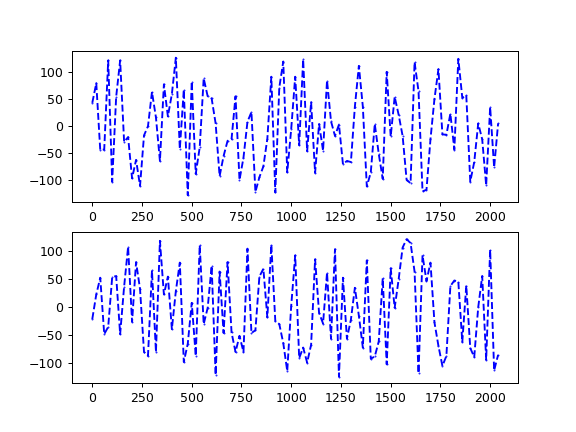

<IPython.core.display.Javascript object>


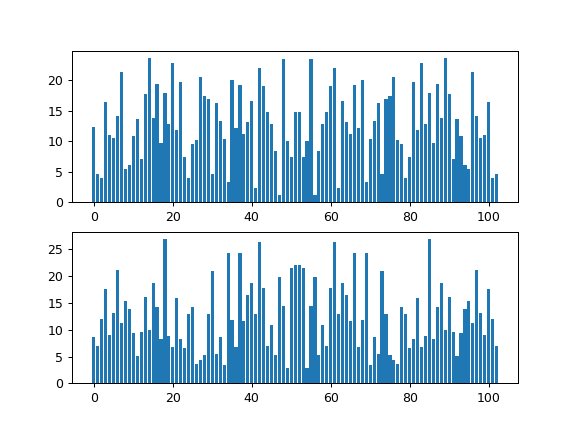

<BarContainer object of 103 artists>

In [29]:
# РОБОТА З ФАЙЛАМИ
# семпл - синомім до фрейм

# код для зчитування даних з мікрофона в режимі реального часу протягом record_seconds секунд
# звук записується за допомогою pyaudio у файл
# він програється
# потім зчитуються байти з файлу у 16-й системі числення за допомогою модуля struct
# модуль дозволяє розпакувати аудіо файл у набір значень
# потім дані відображається за допомогою matplotlib...


#ШЛЯХ ДО ФАЙЛУ 
#os.path.abspath(filename)
import os


#ПОТОЧНА ДАТА І ЧАС
from datetime import datetime
current_datetime = datetime.now()

# імя файлу для запису
filename=str(current_datetime.year)+str(current_datetime.month)+str(current_datetime.day)+str(current_datetime.hour)+str(current_datetime.minute)+str(current_datetime.second)+".wav"


#ЗАПИС ФАЙЛУ. Диктофон
print('\\\\\Диктофон')
import pyaudio
import wave
import struct
# псевдоніми
import numpy as np
import matplotlib.pyplot as plt

# встановлюємо розмір блока в 1024 семпла
# скільки фреймів  буде оброблятися за раз; тривалість кадру; розмір 1*4 байти
CHUNK = 1024
# зразок формату
# аудіоформат (біт на фрейм) 16 біт на фрейм
FORMAT = pyaudio.paInt16
# моно; один канал для мікрофона
channels = 1
# 44100 семплів за секунду
# частота дискретизації - кількість фреймів за 1с
sample_rate = 44100
#тривалість запису у секундах
record_seconds = 3
# initialize PyAudio object
# екземпляр класу
p = pyaudio.PyAudio()
# створюємо потік
# об'єкт потоку, щоб отримати дані з мікрофона
# відкрити об'єкт потоку як введення і виведення
stream = p.open(format=FORMAT,
                channels=channels,
                rate=sample_rate,
                input=True,
                output=True,
                frames_per_buffer=CHUNK)
frames = []
print("Recording...")

#записуємо серіями по 2*CHUNK у масив frames, тобто frames=[[data0],[data1],[data2],...]
for i in range(int(record_seconds*sample_rate / CHUNK)):
    data = stream.read(CHUNK)
    if i==99: #для порівняння з останнім масивом data
        data0=data
        
    # якщо хочемо чути свій голос під час запису
    # stream.write(data)
    frames.append(data)
#     print(len(frames[i]),end='--')
# print(i,'----')

print("Finished recording.")
# зупинити і закрити потік

stream.stop_stream()
stream.close()
# завершити роботу обєкта pyaudio

p.terminate()
# зберегти аудіо файл

# відкриваємо файл в режимі запису байтів 
# print(bin(20), 'bin20')
# print(oct(20),'oct20')
# print(hex(11), 'hex11')
# print(hex(20), 'hex20')
# print(hex(132), 'hex132')
# print('')

#байти;
# пакування в байти; 3-кількість запаковуваних значень; B-формат типу даних
#struct.unpack(формат подання байтів, масив байтів)
# p=struct.pack("3B", 11, 20, 132)
# print(p)
# print('')


wf = wave.open(filename, "wb")

# встановити канали
wf.setnchannels(channels)

# встановити формат зразку
wf.setsampwidth(p.get_sample_size(FORMAT))

# встановити частоту дискретизації
wf.setframerate(sample_rate)
# записуємо кадри як байти
wf.writeframes(b"".join(frames))
# закриваємо файл
wf.close()

print(os.path.abspath(filename))
print('Диктофон/////')

krok=20

#кількість значень (з байтів) буде в два рази більша чим у нашого фрагмента CHUNK, так зашито!
#data = stream.read(CHUNK)
# перетворюємо дані (байти СІ-подібної структури) в цілі числа
# створимо масив data_int - беремо значення з data з кроком krok
# dtype='b' (int8) - тип даних розміром 1 байт, - цілі числа від -128 до 127; 
# print(np.array([127,128,129,151,248],dtype='b'), np.array([127,128,129,151,248],dtype='int8'))
# print(np.array([127,128,129,151,248],dtype='b')+23, np.array([150,151,152,174,271],dtype='int8'))
# [127,128,129,151,248]=[ 127 -128 -127 -105   -8]
# якщо у нас було число, що поміщалося у даний діапазон, то воно залишиться
# якщо у нас було значення 128, то воно перетвориться на -128, бо 128-127-1=0, -128+0=-128
# якщо у нас було значення 129, то воно перетвориться на -127, бо 129-127-1=1, -128+1=-127
# якщо у нас було значення 151, то воно перетвориться на -105, бо 151-127-1=23, -128+23=-105
# якщо у нас було значення 248, то воно перетвориться на -8, бо 248-127-1=120, -128+120=-8


data_int0 = np.array(struct.unpack(str(2 * CHUNK) + 'B', data0),dtype='b')[::krok]+127 
data_int = np.array(struct.unpack(str(2 * CHUNK) + 'B', data),dtype='b')[::krok]+127 

# перевірка
# масив data - це останній елемент з frames розміром 2*CHUNK
# data_test0=np.array(struct.unpack(str(2 * CHUNK) + 'B', data))
# data_test1=np.array(struct.unpack(str(2 * CHUNK) + 'B', data))[::krok]
# data_test2=np.array(struct.unpack(str(2 * CHUNK) + 'B', data),dtype='b')[::krok]
# data_test22=np.array(struct.unpack(str(2 * CHUNK) + 'B', data),dtype='int8')[::krok]
# data_test3=np.array(struct.unpack(str(2 * CHUNK) + 'B', data),dtype='b')[::krok]+127

# print(*data_test0)
# print(data_test1)
# print(data_test2)
# print(data_test22)
# print(data_test3)

# ПРОГРАВАННЯ ФАЙЛУ. Плеєр
print('\\\\\Плеєр')
import sys

wf = wave.open(filename, 'rb')
p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)

data = wf.readframes(CHUNK)

while len(data) > 0:
    stream.write(data)
    data = wf.readframes(CHUNK)

stream.stop_stream()
stream.close()

p.terminate()

print('Плеєр/////')

#print(*data_int1)
#print(*data_int, type(data_int))


#БУДУЄМО ГРАФІКИ ДАНИХ З ФАЙЛУ

# figure - вікно, рисунок на якому будуть графіки
# axes - сам графік, система координат
fig = plt.figure()
# розкреслюємо рисунок на 2 частини
# вставляємо графік в першу комірку
ax1 = fig.add_subplot(2, 1, 1)
# вставляємо графік в другу комірку
ax2 = fig.add_subplot(2, 1, 2)

x3=np.arange(0,2*CHUNK,krok)
y3=data_int0
x4=np.arange(0,2*CHUNK,krok)
y4=data_int


# рисуємо графіки
ax1.plot(x3, y3, color='blue', marker='o', linestyle='--', label='Звукова* доріжка1', markersize=0.5)
ax2.plot(x4, y4, color='blue', marker='o', linestyle='--', label='Звукова* доріжка', markersize=0.5)

# відображаємо графік
plt.show()



# FFT
fig = plt.figure()
ax3 = fig.add_subplot(2, 1, 1)
ax4 = fig.add_subplot(2, 1, 2)
from scipy.fftpack import fft, ifft
    
N0=len(data_int0)
N=len(data_int)

xf = np.linspace(0, N-1, N)
yf3 = np.abs(fft(data_int0))/(N0/2)
yf4 = np.abs(fft(data_int))/(N/2)
# print(yf, len(yf), N, len(xf))  

ax3.bar(xf, yf3)
ax4.bar(xf, yf4)